In [ ]:
pip install paho-mqtt numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
import paho.mqtt.client as mqtt
import json
import time
import random
import numpy as np

# ThingsBoard Settings
THINGSBOARD_HOST = "demo.thingsboard.io"
ACCESS_TOKEN = "jolEqBCSzhYS1fYRa0NY"  # Replace with your token

# MQTT Connection
client = mqtt.Client()
client.username_pw_set(ACCESS_TOKEN)
client.connect(THINGSBOARD_HOST, 1883, 60)

# Simulation Parameters
speed = 60.0
fuel_level = 80.0
engine_temp = 90.0

def generate_telemetry():
    global speed, fuel_level, engine_temp

    # Simulate realistic fluctuations
    speed += random.uniform(-2, 2)
    speed = np.clip(speed, 0, 120)  # Limit between 0-120 km/h

    fuel_level -= random.uniform(0.1, 0.3)
    if fuel_level < 5: fuel_level = 100  # Refuel when low

    engine_temp += random.uniform(-1, 1)
    engine_temp = np.clip(engine_temp, 85, 150)

    # Simulate anomalies (10% chance)
    anomaly = False
    if random.random() < 0.1:
        engine_temp = random.randint(180, 200)  # Critical overheat
        anomaly = True

    return {
        "speed": round(speed, 1),
        "fuel_level": round(fuel_level, 1),
        "engine_temp": round(engine_temp, 1),
        "anomaly": anomaly
    }

# Main loop
try:
    while True:
        data = generate_telemetry()
         # Highlight anomalies in console
        if data["anomaly"]:
            print("! ANOMALY DETECTED !", data)

        client.publish("v1/devices/me/telemetry", json.dumps(data))
        time.sleep(2)  # Send data every 2s
except KeyboardInterrupt:
    client.disconnect()

/tmp/ipython-input-2-137268902.py:12: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


! ANOMALY DETECTED ! {'speed': np.float64(60.8), 'fuel_level': 76.1, 'engine_temp': 193, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(54.8), 'fuel_level': 72.8, 'engine_temp': 190, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(50.6), 'fuel_level': 71.6, 'engine_temp': 186, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(53.1), 'fuel_level': 63.3, 'engine_temp': 181, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(54.5), 'fuel_level': 59.1, 'engine_temp': 189, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(56.4), 'fuel_level': 58.5, 'engine_temp': 187, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(49.8), 'fuel_level': 55.3, 'engine_temp': 186, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(48.5), 'fuel_level': 52.6, 'engine_temp': 199, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(47.3), 'fuel_level': 49.7, 'engine_temp': 193, 'anomaly': True}
! ANOMALY DETECTED ! {'speed': np.float64(49.1

# **Generated By Python**

In [ ]:
###############################

In [ ]:
import random
import pandas as pd

def generate_telemetry():
    speed = random.uniform(40, 120)
    rpm = random.uniform(1000, 4000)
    throttle = random.uniform(10, 80)
    engine_temp = random.uniform(70, 110)
    fuel = random.uniform(20, 100)
    # Occasionally simulate an anomaly
    if random.randint(1, 20) == 1:
        speed *= random.uniform(1.5, 2)
        rpm *= random.uniform(1.5, 2)
        engine_temp += random.uniform(20, 50)
    return {
        'speed': round(speed, 2),
        'rpm': round(rpm, 2),
        'throttle': round(throttle, 2),
        'engine_temp': round(engine_temp, 2),
        'fuel': round(fuel, 2)
    }

# Generate 100 samples
data = [generate_telemetry() for _ in range(100)]
df = pd.DataFrame(data)
df.head()

,speed,rpm,throttle,engine_temp,fuel
0,81.18,1798.71,38.16,75.53,37.45
1,85.71,1309.61,35.54,100.33,86.70
2,168.51,2991.85,63.44,144.66,98.60
3,67.50,3659.84,65.07,88.95,83.35
4,72.08,3289.01,34.16,73.16,53.60


In [ ]:
df.to_csv('vehicle_telemetry.csv', index=False)

In [ ]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
from pyod.models.iforest import IForest

features = ['speed', 'rpm', 'throttle', 'engine_temp', 'fuel']
model = IForest()
model.fit(df[features])

# You can now use the 'model' to predict anomalies on new data
# For example:
# predictions = model.predict(new_data_df[features])
# print(predictions)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
import time

for idx, row in df.iterrows():
    X = row[features].values.reshape(1, -1)
    is_anomaly = model.predict(X)  # 1 if outlier, 0 otherwise
    print(f"Row {idx}: Anomaly? {bool(is_anomaly[0])} | Data: {row.to_dict()}")
    time.sleep(0.1)  # Remove or reduce sleep if running in Colab for speed

Row 0: Anomaly? False | Data: {'speed': 81.18, 'rpm': 1798.71, 'throttle': 38.16, 'engine_temp': 75.53, 'fuel': 37.45}
Row 1: Anomaly? False | Data: {'speed': 85.71, 'rpm': 1309.61, 'throttle': 35.54, 'engine_temp': 100.33, 'fuel': 86.7}
Row 2: Anomaly? True | Data: {'speed': 168.51, 'rpm': 2991.85, 'throttle': 63.44, 'engine_temp': 144.66, 'fuel': 98.6}
Row 3: Anomaly? False | Data: {'speed': 67.5, 'rpm': 3659.84, 'throttle': 65.07, 'engine_temp': 88.95, 'fuel': 83.35}
Row 4: Anomaly? False | Data: {'speed': 72.08, 'rpm': 3289.01, 'throttle': 34.16, 'engine_temp': 73.16, 'fuel': 53.6}
Row 5: Anomaly? False | Data: {'speed': 85.69, 'rpm': 1993.05, 'throttle': 51.32, 'engine_temp': 92.11, 'fuel': 84.62}
Row 6: Anomaly? False | Data: {'speed': 62.83, 'rpm': 1383.96, 'throttle': 46.2, 'engine_temp': 101.81, 'fuel': 92.47}
Row 7: Anomaly? False | Data: {'speed': 108.27, 'rpm': 3434.39, 'throttle': 47.78, 'engine_temp': 82.57, 'fuel': 83.07}
Row 8: Anomaly? False | Data: {'speed': 71.33, 'r

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


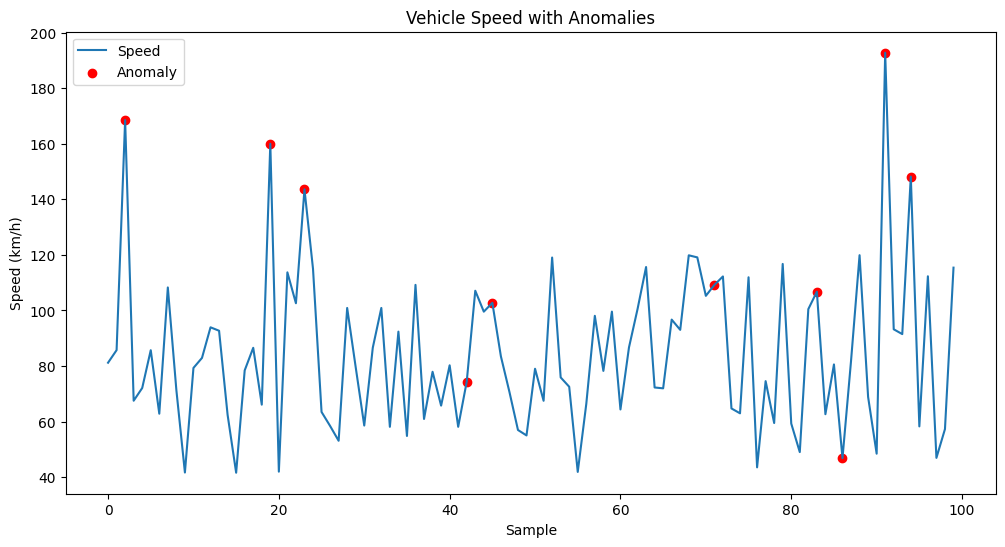

In [ ]:
import matplotlib.pyplot as plt

anomaly_labels = model.predict(df[features])
df['anomaly'] = anomaly_labels

plt.figure(figsize=(12, 6))
plt.plot(df['speed'], label='Speed')
plt.scatter(df.index[df['anomaly'] == 1], df['speed'][df['anomaly'] == 1], color='red', label='Anomaly')
plt.xlabel('Sample')
plt.ylabel('Speed (km/h)')
plt.title('Vehicle Speed with Anomalies')
plt.legend()
plt.show()

Number of anomalies detected: 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


,speed,rpm,throttle,engine_temp,fuel,anomaly
2,168.51,2991.85,63.44,144.66,98.60,1
19,159.98,6906.83,76.46,123.48,35.04,1
23,143.60,6080.28,66.05,120.89,84.96,1
42,74.36,3906.28,30.89,70.63,92.26,1
45,102.73,1157.69,79.42,108.76,27.25,1
71,109.19,3018.96,24.27,73.82,99.71,1
83,106.75,3910.50,29.50,108.93,22.22,1
86,46.82,3440.09,24.04,75.32,34.13,1
91,192.75,4971.22,67.42,118.01,25.79,1
94,148.16,1609.48,74.45,130.53,22.22,1


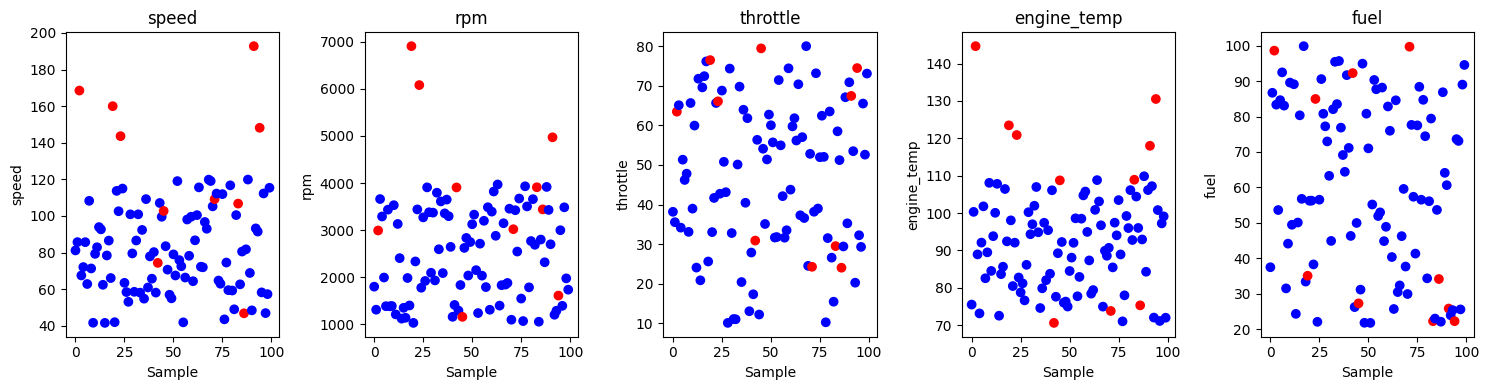

In [ ]:
# Assume df and model are already defined as in previous steps
anomaly_labels = model.predict(df[features])
df['anomaly'] = anomaly_labels

# Show all anomalies
anomalies = df[df['anomaly'] == 1]
print("Number of anomalies detected:", len(anomalies))
display(anomalies)

# Visualize anomalies across all features
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    plt.scatter(df.index, df[col], label='Normal', c=['red' if a == 1 else 'blue' for a in df['anomaly']])
    plt.xlabel('Sample')
    plt.ylabel(col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF

# One-Class SVM
ocsvm = OCSVM()
ocsvm.fit(df[features])
df['anomaly_ocsvm'] = ocsvm.predict(df[features])

# Local Outlier Factor
lof = LOF()
lof.fit(df[features])
df['anomaly_lof'] = lof.predict(df[features])

# Compare number of anomalies
print("Isolation Forest:", df['anomaly'].sum())
print("One-Class SVM:", df['anomaly_ocsvm'].sum())
print("Local Outlier Factor:", df['anomaly_lof'].sum())

Isolation Forest: 10
One-Class SVM: 0
Local Outlier Factor: 9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


In [ ]:
# Try different contamination values for Isolation Forest
from pyod.models.iforest import IForest

for contamination in [0.01, 0.05, 0.1, 0.2]:
    tuned_model = IForest(contamination=contamination)
    tuned_model.fit(df[features])
    tuned_labels = tuned_model.predict(df[features])
    print(f"Contamination {contamination}: {sum(tuned_labels)} anomalies detected")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination 0.01: 1 anomalies detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination 0.05: 5 anomalies detected
Contamination 0.1: 10 anomalies detected
Contamination 0.2: 20 anomalies detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


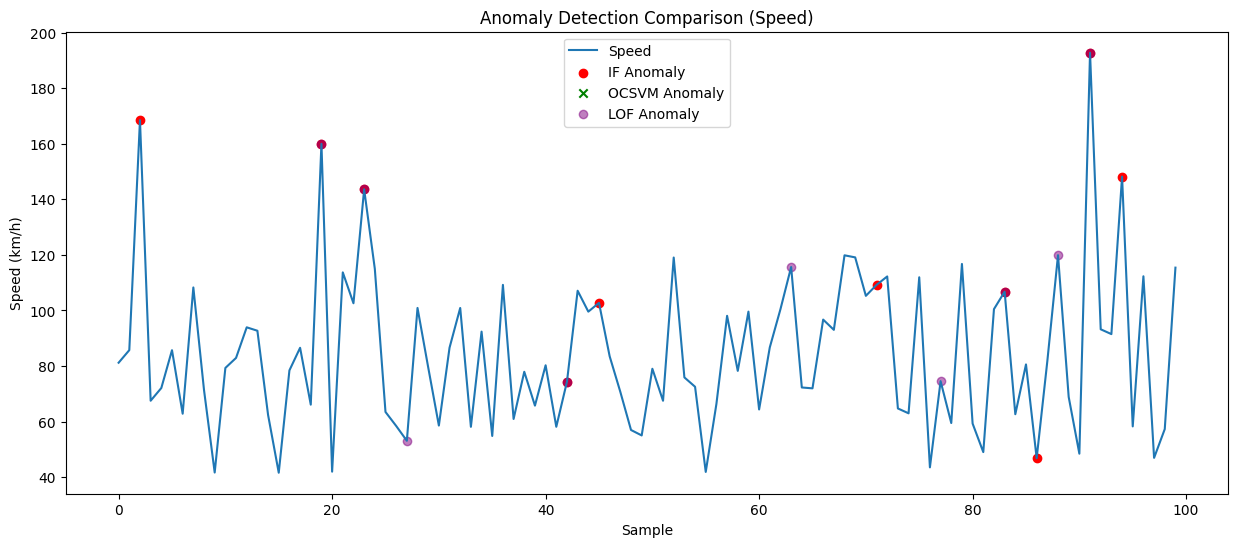

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['speed'], label='Speed')
plt.scatter(df.index[df['anomaly'] == 1], df['speed'][df['anomaly'] == 1], color='red', label='IF Anomaly')
plt.scatter(df.index[df['anomaly_ocsvm'] == 1], df['speed'][df['anomaly_ocsvm'] == 1], color='green', marker='x', label='OCSVM Anomaly')
plt.scatter(df.index[df['anomaly_lof'] == 1], df['speed'][df['anomaly_lof'] == 1], color='purple', marker='o', label='LOF Anomaly', alpha=0.5)
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Speed (km/h)')
plt.title('Anomaly Detection Comparison (Speed)')
plt.show()

In [ ]:
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS

# KNN
knn = KNN()
knn.fit(df[features])
df['anomaly_knn'] = knn.predict(df[features])

# HBOS
hbos = HBOS()
hbos.fit(df[features])
df['anomaly_hbos'] = hbos.predict(df[features])

# You can print how many anomalies each model detected
print("KNN anomalies:", df['anomaly_knn'].sum())
print("HBOS anomalies:", df['anomaly_hbos'].sum())

KNN anomalies: 9
HBOS anomalies: 10


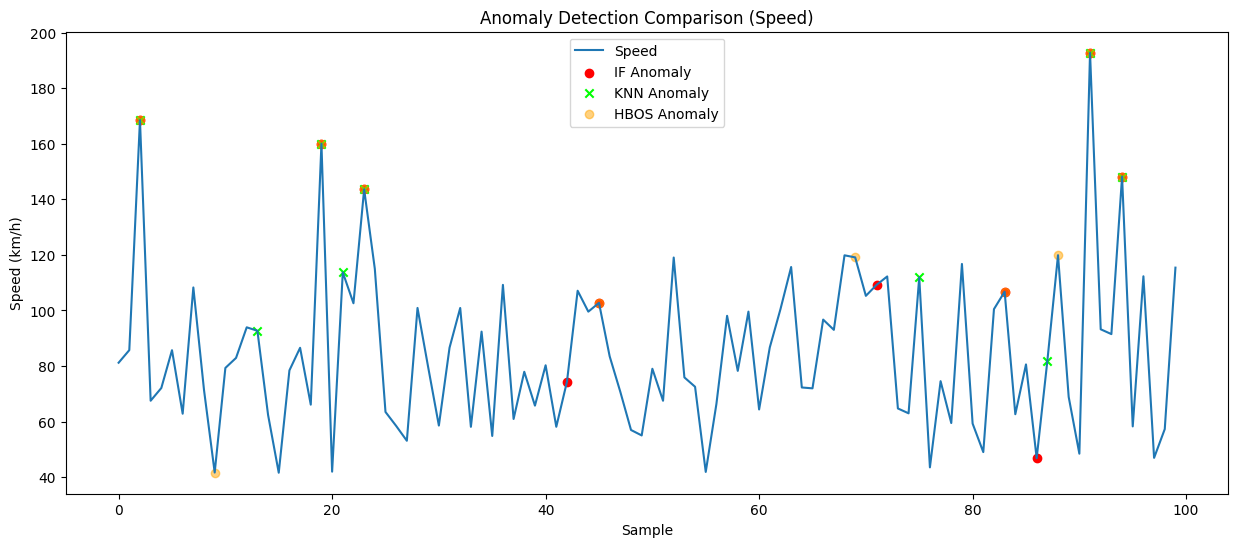

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df['speed'], label='Speed')
plt.scatter(df.index[df['anomaly'] == 1], df['speed'][df['anomaly'] == 1], color='red', label='IF Anomaly')
plt.scatter(df.index[df['anomaly_knn'] == 1], df['speed'][df['anomaly_knn'] == 1], color='lime', marker='x', label='KNN Anomaly')
plt.scatter(df.index[df['anomaly_hbos'] == 1], df['speed'][df['anomaly_hbos'] == 1], color='orange', marker='o', label='HBOS Anomaly', alpha=0.5)
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Speed (km/h)')
plt.title('Anomaly Detection Comparison (Speed)')
plt.show()

,Model,Num Anomalies
0,Isolation Forest,10
1,One-Class SVM,0
2,LOF,9
3,KNN,9
4,HBOS,10


Overlap of anomaly predictions (0=normal, 1=anomaly for each model in order):
(np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)): 80 samples
(np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1)): 2 samples
(np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1)): 2 samples
(np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0)): 4 samples
(np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1)): 3 samples
(np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)): 3 samples
(np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0)): 1 samples
(np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1)): 1 samples
(np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0)): 2 samples
(np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)): 1 samples
(np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1)): 1 samples


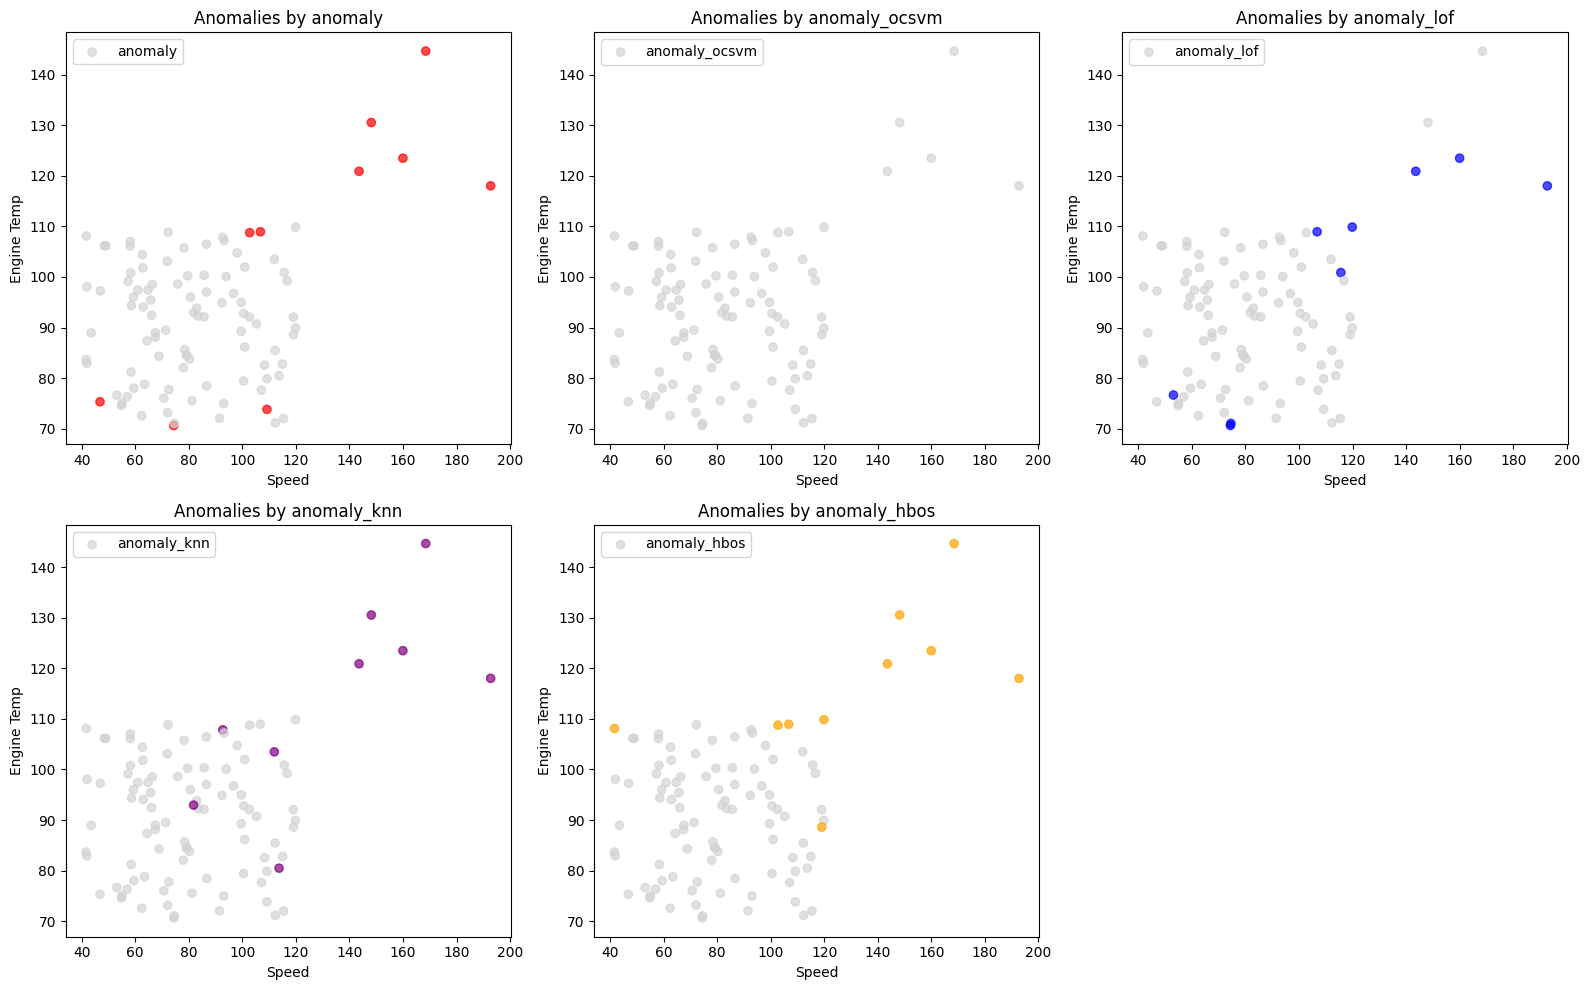

/usr/local/lib/python3.11/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:107: UserWarning: Circle B has zero area.
  warnings.warn("Circle B has zero area.")


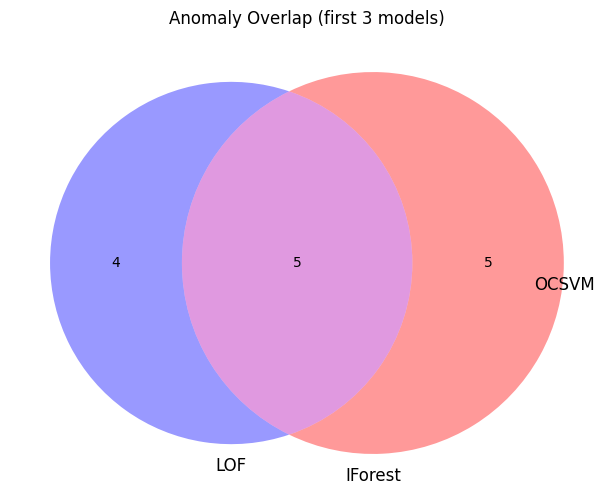

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure you have these columns in your df:
# 'anomaly', 'anomaly_ocsvm', 'anomaly_lof', 'anomaly_knn', 'anomaly_hbos'

# 1. Summary Table: Number of anomalies detected by each model
summary = {
    'Isolation Forest': df['anomaly'].sum(),
    'One-Class SVM': df['anomaly_ocsvm'].sum(),
    'LOF': df['anomaly_lof'].sum(),
    'KNN': df['anomaly_knn'].sum(),
    'HBOS': df['anomaly_hbos'].sum()
}
summary_df = pd.DataFrame(list(summary.items()), columns=['Model', 'Num Anomalies'])
display(summary_df)

# 2. Overlap: How many points are flagged by multiple models?
from collections import Counter

combo = df[['anomaly', 'anomaly_ocsvm', 'anomaly_lof', 'anomaly_knn', 'anomaly_hbos']].values
combo_signatures = [tuple(row) for row in combo]
overlap_counts = Counter(combo_signatures)

print("Overlap of anomaly predictions (0=normal, 1=anomaly for each model in order):")
for k, v in overlap_counts.items():
    print(f"{k}: {v} samples")

# 3. Visual Comparison: Scatter plot (e.g., speed vs engine_temp), color by model's anomaly prediction
colors = {
    'anomaly': 'red',
    'anomaly_ocsvm': 'green',
    'anomaly_lof': 'blue',
    'anomaly_knn': 'purple',
    'anomaly_hbos': 'orange'
}

plt.figure(figsize=(16, 10))
for i, (col, color) in enumerate(colors.items()):
    plt.subplot(2, 3, i+1)
    plt.scatter(df['speed'], df['engine_temp'],
                c=df[col].map({0: 'lightgrey', 1: color}),
                label=col, alpha=0.7)
    plt.xlabel('Speed')
    plt.ylabel('Engine Temp')
    plt.title(f'Anomalies by {col}')
    plt.legend()
plt.tight_layout()
plt.show()

# 4. (Optional) Venn Diagram of anomaly overlaps (needs matplotlib-venn)
# Install with: !pip install matplotlib-venn
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn3([
    set(df.index[df['anomaly'] == 1]),
    set(df.index[df['anomaly_ocsvm'] == 1]),
    set(df.index[df['anomaly_lof'] == 1])
], set_labels=('IForest', 'OCSVM', 'LOF'))
plt.title('Anomaly Overlap (first 3 models)')
plt.show()